<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/ORB_KeyPointDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
imgPath=root_path+"/vidhana_soudha_2.jpg"

Mounted at /content/gdrive


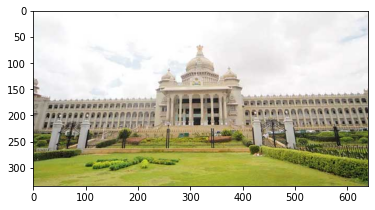

In [4]:
im = cv2.imread(imgPath,1)
if (im.any() == None):
  print("Empty Image")
plt.imshow(im[...,::-1])

Feature Extraction
For this competition, we will be mostly matching images based on their local features, a.k.a. interest points.

A local image feature is a tiny patch in the image that's invariant to image scaling, rotation and change in illumination. It's like the tip of a tower, or the corner of a window in the image above. Unlike a random point on the background (sky) in the image above, the tip of the tower can be precise detected in most images of the same scene. It is geometricly (translation, rotation, ...) and photometricly (brightness, exposure, ...) invariant.

A good local feature is like the piece you start with when solving a jigsaw puzzle, except on a much smaller scale. It's the eye of the cat or the corner of the table, not a piece on a blank wall.

The extracted local features must be:

Repeatable and precise so they can be extracted from different images showing the same object.
Distinctive to the image, so images with different structure will not have them.
There could be hundreds or thousands of such features in an image. An image matcher algorithm could still work if some of the features are blocked by an object or badly deformed due to change in brightness or exposure. Many local feature algorithms are highly efficient and can be used in real-time applications.

Due to these requirements, most local feature detectors extract corners and blobs.

In this tutorial, we will use Oriented FAST and Rotated BRIEF (ORB) for feature detection and description. This algorithm was developed and implemented by OpenCV Labs, and it's part of their OpenCV library for computer vision.

Let's start by extracting the local features of the image shown in the building above. It's the Vidhan Soudha Building in Bangalore, India.

In [5]:
img_building = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

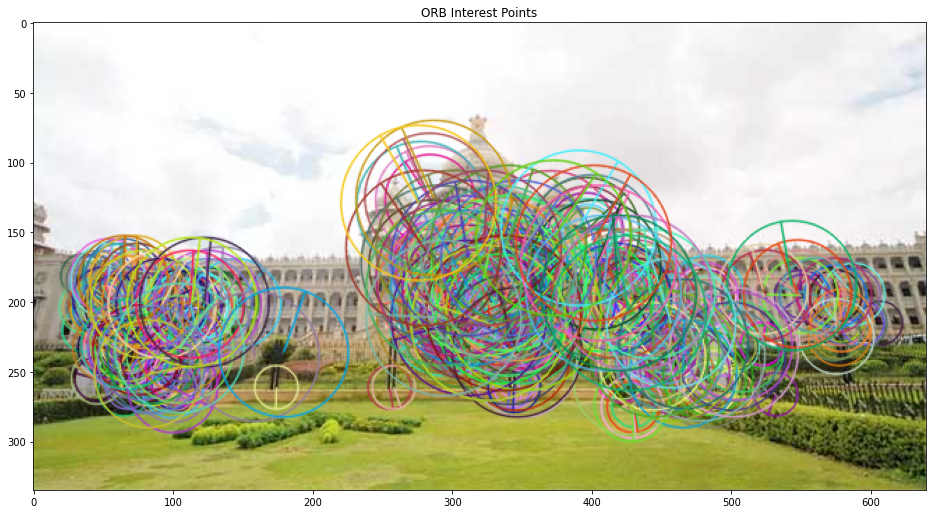

In [6]:
orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()